In [116]:
import csv
import math
import random

In [117]:
def load_csv(filename):
    lines = csv.reader(open(r'diabetes.csv'))
    diabatiesdf = list(lines)
    diabatiesdf = diabatiesdf[1:]  # Removing the header from the dataset
    for i in range(len(diabatiesdf)):
        diabatiesdf[i]=[float(x) for x in diabatiesdf[i]]
    return diabatiesdf

In [118]:
def splitDataset(dataset,splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet,copy]

In [136]:
def seperateByClass(dataset):
    seperated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in seperated):
            seperated[vector[-1]]=[]
        seperated[vector[-1]].append(vector)
    return seperated
        

In [120]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))
    

In [144]:
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)
    

In [122]:
def summarize(dataset):
    summaries = [(mean(attribute),stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [140]:
def summarizeByClass(dataset):
    seperated = seperateByClass(dataset)
    summaries = {}
    for classValue,instances in seperated.items():
        summaries[classValue] = summarize(instances)
        return summaries

In [124]:
def calculateProbability(x,mean,stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1/(math.sqrt(2*math.pi)*stdev))*exponent

In [154]:
def calculateClassProbabilities(summaries,inputVector):
    probabilities = {}
    for classValue,classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean,stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x,mean,stdev)
        return probabilities

In [160]:
def predict(summaries , inputVector):
    probabilities = calculateClassProbabilities(summaries,inputVector)
    bestLabel , bestProb = None, -1
    for classValue,probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [164]:
def getPerdictions(summaries,testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries,testSet[i])
        predictions.append(result)
    return predictions

In [168]:
def getAccuracy(testSet,perdictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == perdictions[x]:
            correct += 1
    return (correct/float(len(testSet)))*100.0

In [182]:
def main():
    filename = 'diabetes.csv'
    splitRatio = 0.66
    dataset = load_csv(filename)
    trainingSet,testSet = splitDataset(dataset,splitRatio)
    print('split {0} rows into train = {1} and test = {2} rows'.format(len(dataset),len(trainingSet),len(testSet)))
    #prepare model
    summaries = summarizeByClass(trainingSet)
    #test model
    predictions = getPerdictions(summaries,testSet)
    accuracy = getAccuracy(testSet,predictions)
    print('Accuracy: {0}%'.format(accuracy))

main()    


split 768 rows into train = 506 and test = 262 rows
Accuracy: 64.8854961832061%


# SciKit-Learn Naive Bayes

In [188]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [192]:
dataset = datasets.load_iris()

In [194]:
model = GaussianNB()
model.fit(dataset.data,dataset.target)

GaussianNB()

In [196]:
print(model)

GaussianNB()


In [198]:
expected = dataset.target
predicted = model.predict(dataset.data)

In [202]:
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


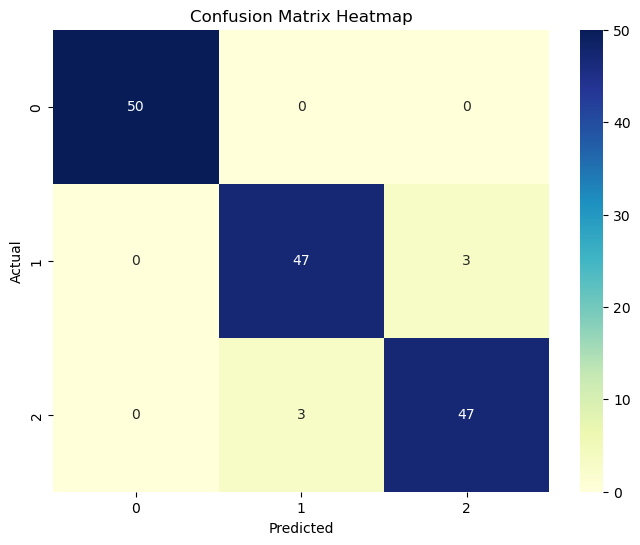

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(expected,predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()